In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb
# import sklearn.model_selection as train_test_split

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png')
from IPython.core.pylabtools import figsize
figsize(10, 6) # Width and hight
#plt.style.use('seaborn-white')

In [9]:
# Load training data 
trainData = pd.read_csv("train.csv", na_values='?', dtype={'ID': str}).dropna().reset_index()
trainData.head()


,index,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,Female
1,1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,Male
2,2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,Male
3,3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,Male
4,4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,Male


In [10]:
trainData.describe()

,index,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,519.000000,2334.256015,11004.368624,4108.256978,2525.024062,7.767084,1999.862368,3.507218,4561.855630,111.149182,42.353766,35.929588,38.716073,35.486044
std,300.077768,2157.216744,6817.397413,2981.251156,2498.747279,3.901439,10.406632,2.088526,3417.855987,151.761551,7.817110,8.957193,12.285902,12.046696
min,0.000000,0.000000,1351.000000,318.000000,1.000000,1.000000,1939.000000,1.000000,0.000000,0.000000,19.000000,11.000000,11.000000,7.000000
25%,259.500000,904.000000,6353.500000,2077.000000,814.500000,5.000000,1994.000000,2.000000,2139.500000,22.000000,37.480769,29.500000,30.000000,28.000000
50%,519.000000,1711.000000,9147.000000,3297.000000,1834.000000,7.000000,2000.000000,3.000000,3824.000000,60.000000,42.600000,35.000000,38.000000,34.000000
75%,778.500000,3030.500000,13966.500000,5227.000000,3364.000000,10.000000,2009.000000,5.000000,5887.500000,143.500000,47.333333,41.500000,46.000000,41.000000
max,1038.000000,17658.000000,67548.000000,28102.000000,25822.000000,29.000000,2015.000000,16.000000,31146.000000,1798.000000,71.000000,81.333333,81.000000,85.000000


In [11]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 1039 non-null   int64  
 1   Number words female                   1039 non-null   int64  
 2   Total words                           1039 non-null   int64  
 3   Number of words lead                  1039 non-null   float64
 4   Difference in words lead and co-lead  1039 non-null   int64  
 5   Number of male actors                 1039 non-null   int64  
 6   Year                                  1039 non-null   int64  
 7   Number of female actors               1039 non-null   int64  
 8   Number words male                     1039 non-null   int64  
 9   Gross                                 1039 non-null   float64
 10  Mean Age Male                         1039 non-null   float64
 11  Mean Age Female  

<function matplotlib.pyplot.show(close=None, block=None)>

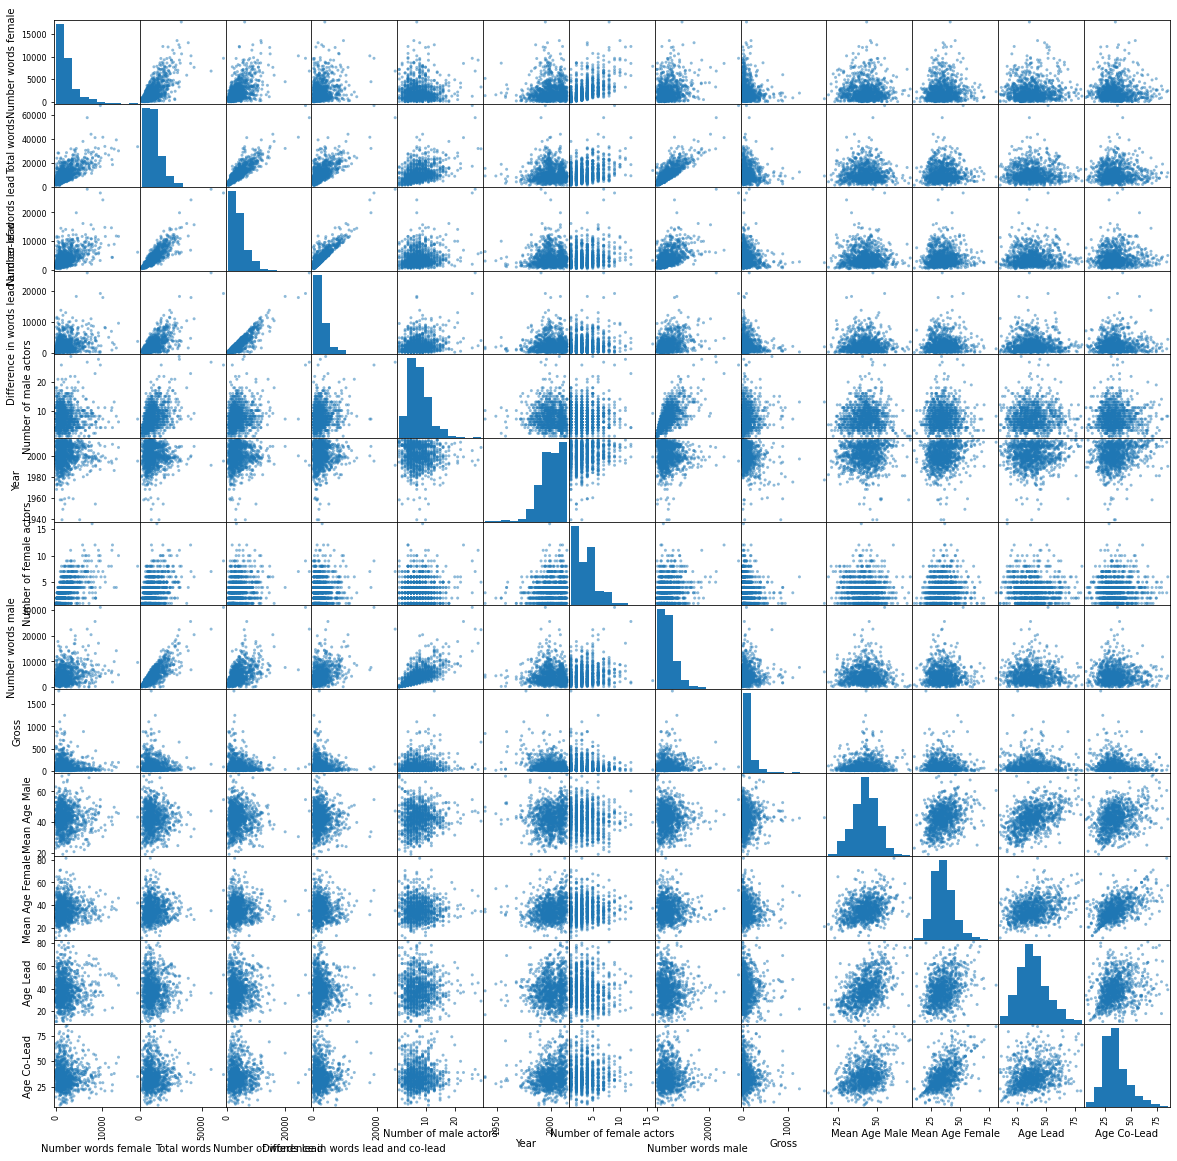

In [12]:
#Scatterplot of the variables 1-9
pd.plotting.scatter_matrix(trainData.iloc[:,1:15], figsize=(20,20))
plt.show

In [14]:
# Load test data 
testData = pd.read_csv("test.csv", na_values='?', dtype={'ID': str}).dropna().reset_index()
testData.head()

,index,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead
0,0,669,5388,2564.0,2241,8,2005,3,2155,46.0,33.571429,31.0,50.0,18.0
1,1,161,3468,1347.0,1186,5,2001,1,1960,278.0,39.600000,34.0,54.0,34.0
2,2,1720,14712,2818.0,2231,18,2008,5,10174,53.0,35.615385,40.0,23.0,28.0
3,3,3342,24930,11204.0,9912,13,2001,6,10384,81.0,40.416667,30.2,38.0,27.0
4,4,1520,14676,4378.0,2858,6,1992,1,8778,131.0,33.833333,34.0,46.0,34.0


In [15]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 387 non-null    int64  
 1   Number words female                   387 non-null    int64  
 2   Total words                           387 non-null    int64  
 3   Number of words lead                  387 non-null    float64
 4   Difference in words lead and co-lead  387 non-null    int64  
 5   Number of male actors                 387 non-null    int64  
 6   Year                                  387 non-null    int64  
 7   Number of female actors               387 non-null    int64  
 8   Number words male                     387 non-null    int64  
 9   Gross                                 387 non-null    float64
 10  Mean Age Male                         387 non-null    float64
 11  Mean Age Female    

<function matplotlib.pyplot.show(close=None, block=None)>

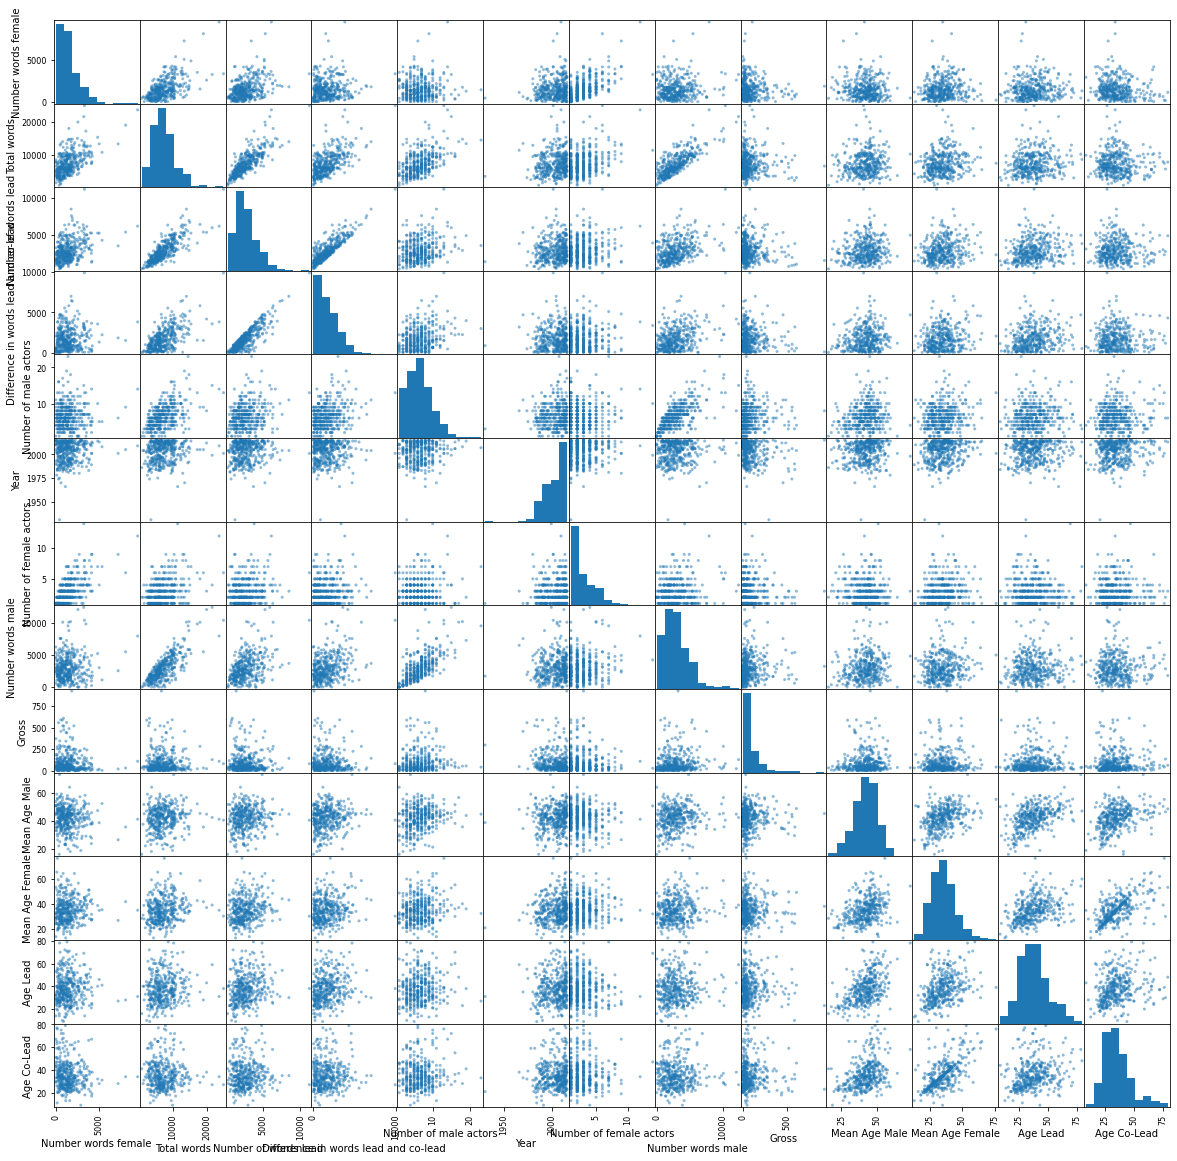

In [16]:
#Scatterplot of the variables
pd.plotting.scatter_matrix(testData.iloc[:,1:14], figsize=(20,20))
plt.show

In [18]:
#Set random numbers
print(f"train.shape: {trainData.shape}") 
"Set seed to get reproducible results"
np.random.seed(1)

#Split in set
# trainI=np.random.choice(trainData.shape[0], replace=False)
# trainIndex=auto.index.isin(trainI)
# # print(f"TrainIndex:{trainIndex}")
# # print(f"trainI:{trainI}")
# train=train.iloc[trainIndex]
# test=train.iloc[~trainIndex]
# X_train, X_test, y_train, y_test = train_test_split(train., y, test_size=0.33, random_state=42)
print(f" {trainData}")

train.shape: (1039, 15)
       index  Number words female  Total words  Number of words lead  \
0         0                 1512         6394                2251.0   
1         1                 1524         8780                2020.0   
2         2                  155         4176                 942.0   
3         3                 1073         9855                3440.0   
4         4                 1317         7688                3835.0   
...     ...                  ...          ...                   ...   
1034   1034                  303         2398                1334.0   
1035   1035                  632         8404                1952.0   
1036   1036                 1326         2750                 877.0   
1037   1037                  462         3994                 775.0   
1038   1038                 2735        11946                3410.0   

      Difference in words lead and co-lead  Number of male actors  Year  \
0                                      343     

In [19]:
X_train=trainData[["Number words female",
              "Total words", 
              "Number of words lead", 
              "Difference in words lead and co-lead",
              "Number of male actors",
              "Year",
              "Number of female actors",
              "Number words male",
              "Gross",
              "Mean Age Male",
              "Mean Age Female",
              "Age Lead",
              "Age Co-Lead"]]
Y_train=trainData[["Lead"]]

# X_train[:10]
#Y_train[:10]
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train.values.ravel(), test_size=0.2, random_state=0)

model=skl_nb.KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, Y_train)
# print("Model summary")
print(model.classes_)

prediction=model.predict(X_test)
# print(predict_prob)
#Confusion matrix
print("Confusion matrix:\n")
print(pd.crosstab(prediction, Y_test),"\n")

['Female' 'Male']
Confusion matrix:

col_0   Female  Male
row_0               
Female      27    12
Male        38   131 



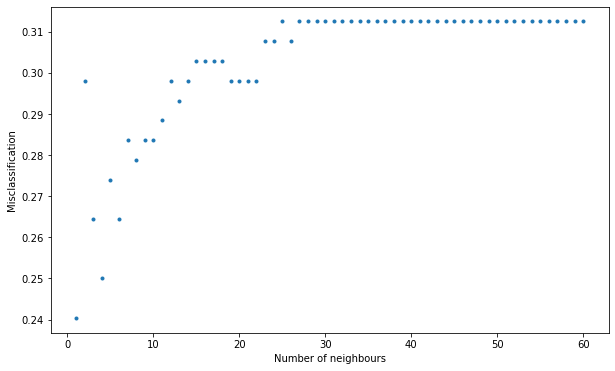

In [20]:
#Try different values for kNN
misclassification=[]

for k in range(60):
    model=skl_nb.KNeighborsClassifier(n_neighbors=k+1)
    model.fit(X_train, Y_train)
    prediction=model.predict(X_test)
    misclassification.append(np.mean(prediction != Y_test))

X = np.linspace(1, 60, 60)
plt.plot(X, misclassification, ".")
plt.xlabel("Number of neighbours")
plt.ylabel("Misclassification")
plt.show()

In [21]:
#Accuracy
prediction=model.predict(X_test)
print(f"Accuracy:{np.mean(prediction==Y_test)}")

Accuracy:0.6875
